# Project: Investigate TMDb Movies Dataset

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介
> 此报告记录了从1960-2015年欧美电影近50年的电影数据，有关于budget、revenue、director、cast、vote_count、vote_average等信息，无论从哪方面入手分析，都可以很方便的获取信息，此报告着重分析了以下两点：  
> 1.高票房电影有哪些特点，这样对于影视制作公司有一个较为清晰的思路，掌握观众的观影需求  
> 2.近几年的电影总产量，以及整体电影市场的走向  

In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。

# 务必包含一个‘magic word’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import csv
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('.\\tmdb-movies.csv')

<a id='wrangling'></a>
## 数据整理


### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据

df = pd.read_csv('.\\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### 数据清理

In [4]:
# convert to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

In [5]:
# 查看是否存在重复数据
print(df.duplicated().sum())
df[df.duplicated()]

1


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [6]:
df[df['id'] == 42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [7]:
# 删除重复数据

df.drop_duplicates(inplace=True)

In [8]:
df.shape

(10865, 21)

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1：票房高(revenue_adj)的电影有哪些特点（可能是受哪些因素影响）？

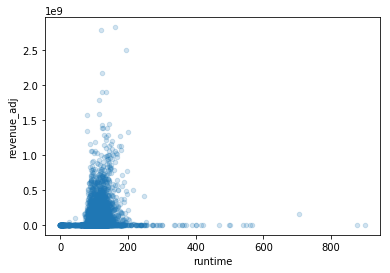

In [9]:
# revenue_adj vs runtime

df.plot(x = 'runtime',y = 'revenue_adj',kind = 'scatter', alpha=0.2);

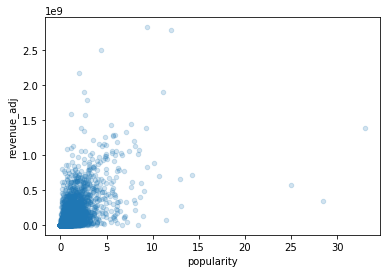

In [10]:
# revenue_adj vs popularity

df.plot(x = 'popularity',y = 'revenue_adj',kind = 'scatter', alpha=0.2);

In [11]:
# 查看runtime>200的影片信息

df[df['runtime']>200]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
415,340968,tt2492296,0.249595,0,0,Show Me a Hero,Oscar Isaac|Alfred Molina|Winona Ryder|Catheri...,NaN,Paul Haggis,How does a politician know he's doing the righ...,...,Mayor Nick Wasicsko took office in 1987 during...,300,History|Crime|Drama,NaN,2015-08-16,32,7.7,2015,0.000000e+00,0.000000e+00
559,373977,tt4146128,0.031635,0,0,Childhood's End,Mike Vogel|Osy Ikhile|Daisy Betts|Georgina Hai...,NaN,Nick Hurran,NaN,...,"After peaceful aliens invade earth, humanity f...",246,Thriller|TV Movie|Science Fiction|Drama,NaN,2015-12-14,21,6.2,2015,0.000000e+00,0.000000e+00
609,321640,tt4299972,0.033378,0,0,The Jinx: The Life and Deaths of Robert Durst,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,NaN,Andrew Jarecki,Four Decades. Three Murders. And One Very Rich...,...,"Robert Durst, scion of one of New Yorkâ€™s bil...",240,Documentary,Blumhouse Productions|Hit the Ground Running F...,2015-02-08,72,8.4,2015,0.000000e+00,0.000000e+00
989,289314,tt3012698,0.369555,0,0,Olive Kitteridge,Frances McDormand|Richard Jenkins|Bill Murray|...,NaN,Lisa Cholodenko,There's no such thing as a simple life.,...,The story focuses on a middle-school math teac...,233,Drama,Home Box Office (HBO)|Playtone Productions|As ...,2014-11-02,41,7.1,2014,0.000000e+00,0.000000e+00
1077,289394,tt3132738,0.342044,0,0,Houdini,Adrien Brody|Kristen Connolly|Evan Jones|Tom B...,NaN,Uli Edel,NaN,...,Follow the man behind the magic as he finds fa...,210,TV Movie|Drama|History,A&E Television Networks|Lionsgate Television,2014-09-01,53,7.1,2014,0.000000e+00,0.000000e+00
1183,312497,tt3696720,0.028695,0,0,Ascension,Tricia Helfer|Gil Bellows|Brian Van Holt|Andre...,NaN,Mairzee Almas|Nick Copus|Robert Lieberman,Be part of mankind's last hope.,...,"In this three-part miniseries, a young woman's...",282,Drama|Science Fiction|TV Movie,NaN,2014-12-15,30,5.5,2014,0.000000e+00,0.000000e+00
1235,242754,tt2761630,0.093377,0,0,Klondike,Richard Madden|Abbie Cornish|Sam Shepard|Tim R...,http://www.klondiketv.com,Simon Cellan Jones,Stake your claim.,...,The story centers on the friendship of two adv...,285,Drama|History,Scott Free Productions|Discovery Channel|E1 En...,2014-01-20,17,6.7,2014,0.000000e+00,0.000000e+00
1678,61872,tt1461312,0.342084,0,0,Alice,Caterina Scorsone|Kathy Bates|Andrew-Lee Potts...,NaN,Nick Willing,Welcome to a whole new Wonderland.,...,The story takes place in Wonderland 150 years ...,240,Fantasy|Drama|Science Fiction,NaN,2009-12-06,32,6.0,2009,0.000000e+00,0.000000e+00
1802,183894,tt1366312,0.189207,0,0,Emma,Romola Garai|Michael Gambon|Jonny Lee Miller|L...,NaN,Jim O'Hanlon,NaN,...,"Emma Woodhouse seems to be perfectly content, ...",240,Romance|Comedy|Drama,NaN,2009-10-11,17,7.6,2009,0.000000e+00,0.000000e+00
1865,220903,tt1533395,0.102223,0,0,Life,David Attenborough|Oprah Winfrey,http://www.bbc.co.uk/programmes/b00lbpcy,Martha Holmes|Simon Blakeney|Stephen Lyle,From the Makers of Planet Earth,...,David Attenborough's legendary BBC crew explai...,500,Documentary,British Broadcasting Corporation (BBC),2009-12-14,24,7.0,2009,0.000000e+00,0.000000e+00


> 从以上分析来看，票房较高的电影runtime主要集中在 100-200 这段区间,同时我初步查看了片长大于200分钟的信息，影片类型大多是以纪录片、历史为主，说明这类型电影市场不是太乐观。  
> popularity集中在 5-10 之间的电影票房收益较高，但是大量的电影popularity小于5，且占据主要的电影票房

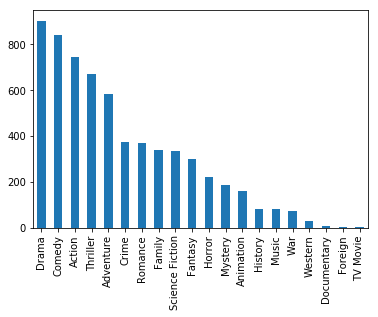

In [12]:
# 统计票房大于平均值的电影类型以及数量

high_revenue = df[df['revenue_adj']>df['revenue_adj'].mean()]

df_genres_split = high_revenue['genres'].str.split('|', expand=True).stack() \
                                        .reset_index(level=0).set_index('level_0') \
                                        .rename(columns={0:'genres'})

df_genres_split['genres'].value_counts().plot(kind='bar');

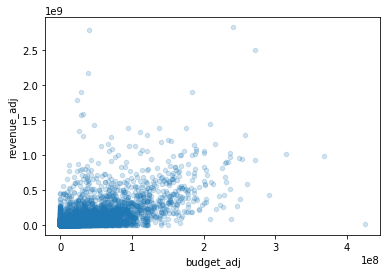

In [13]:
# budget_adj va revenue_adj

df.plot(x = 'budget_adj' , y = 'revenue_adj' , kind = 'scatter', alpha=0.2);

> 根据上图来看，票房大于平均值的电影类型主要是以Drama、Comedy、Action、Thriller、Adventure这类电影居多，那么电影公司在创作时可以主要选择这类题材电影进行拍摄。   
> 再结合budget和revenue来看，一部电影的票房与投入关系并不是非常的密切，这还要取决于电影的题材、演员、导演等多方面因素，从而可以观察到观众对于只是投入高的电影是不买账的，说明消费者还是很理性的，有明确的消费观念。

### 研究问题 2：近几年的电影数量发展情况？票房收益如何？

In [14]:
# 统计近几年电影数量

df.groupby(['release_year']).size()

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
dtype: int64

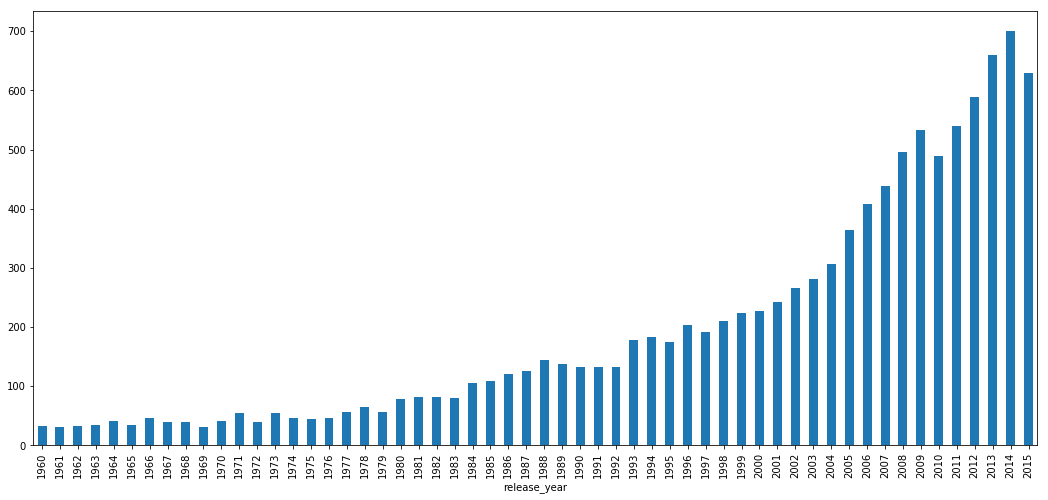

In [15]:
df.groupby(['release_year']).size().plot(kind = 'bar',figsize = (18,8));

> 根据上图可以看出，从1993年开始每年的电影数量呈明显的上升趋势，在2010年出现了小程度的下滑，但随后又恢复上升趋势，2015年的电影产量较2014年有将近100部的差距，我觉得是因为近几年电影产业的迅速发展，观众的观影要求也在逐步提高，导致了制作电影周期较长而出现的情况  

In [16]:
# 添加新列，并计算每部电影的盈利
    
df['profit'] = df.apply(lambda x :x['revenue_adj'] - x['budget_adj'], axis = 1)

In [17]:
# 统计1960-2015年的电影收益

profits = df.groupby(['release_year'],as_index = False).sum()

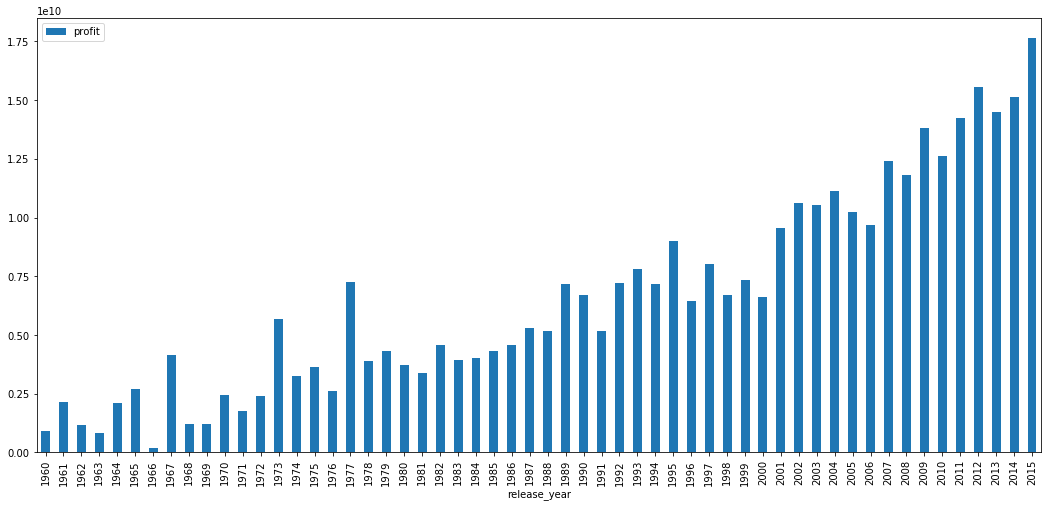

In [18]:
profits.plot(x = 'release_year',y = 'profit',kind = 'bar',figsize = (18,8));

> 根据上图可以看到虽然每年的电影收益情况忽高忽低，但整体呈明显的上升趋势，表明这几年整体的电影市场还是很乐观的，尤其在2015年达到了利润的最高点，结合刚刚2015的电影产量还有所下滑，那表明观众更趋于理性消费，对电影的质量要求提高了

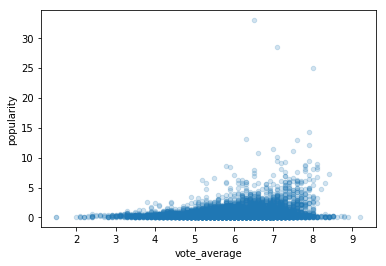

In [19]:
# popularity vs vote_average
df.plot(x = "vote_average", y = "popularity" , kind = 'scatter', alpha=0.2);

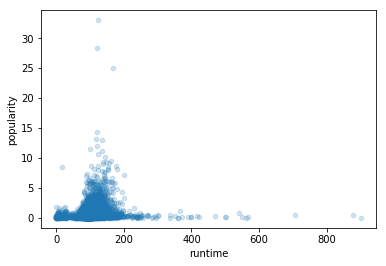

In [20]:
# popularity vs runtime
df.plot(x = 'runtime', y = "popularity", kind = 'scatter' , alpha=0.2);

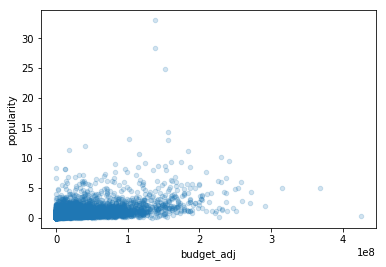

In [21]:
df.plot(x = 'budget_adj', y = "popularity", kind = 'scatter', alpha=0.2);

> 结合以上分析来看，popularity与vote_average呈正相关分布，但其他两个因素的关联度就不是那么密切了，这样也证明了popularity高的电影是与许多因素有  关的，再选择影视制作的时候要多方面分析。

<a id='conclusions'></a>
## 结论

> 整体来说，这些年的电影市场走向依然是处在一个稳步上升的阶段，从收益以及电影产量来看发展良好。    
> 单以某一步电影来看，vote_average高的电影唯一的特点是它的popularity也相对较高，与其他因素没有太大的联系。    
> 一部电影的最终市场反映，与多方面因素有关，比如演员、导演、剧情、预算等，此分析报告我仅从票房、电影数量等方面着重分析。

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295